<a href="https://colab.research.google.com/github/ManuelBagasina/solarspell/blob/playground/HealthSafetyResearchData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries for data handling, plotting, and file uploads
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# This will prompt you to upload a file from your local machine
print("Please upload your data file (e.g., Combined2023-2025.csv or .xlsx)")
uploaded = files.upload()

# Get the filename of the uploaded file
# This makes the script work even if the filename changes slightly
filename = next(iter(uploaded))
print(f"\nSuccessfully uploaded: '{filename}'")

Please upload your data file (e.g., Combined2023-2025.csv or .xlsx)


Saving Combined2023-2025.xlsx to Combined2023-2025.xlsx

Successfully uploaded: 'Combined2023-2025.xlsx'


In [ ]:
# Step 2: Load the data and list all column names

try:
    # Try loading as a CSV file first
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
    # If it's an Excel file, load it with this
    elif filename.endswith(('.xls', '.xlsx')):
        df = pd.read_excel(filename)
    else:
        raise ValueError("Unsupported file format. Please upload a .csv or .xlsx file.")

    print("File loaded successfully!")
    print("\n--- AVAILABLE COLUMN NAMES ---")
    # Print each column name on a new line for easy reading
    for col in df.columns:
        print(col)

except Exception as e:
    print(f"An error occurred while loading the file: {e}")

File loaded successfully!

--- AVAILABLE COLUMN NAMES ---
id
title
activity_type
language
content_type
subject
parent_folder
referrer
activity_date
browser
device_type
device_os
location
keyword
format
audience
rights_holder
country
year_units_retrieved
creator
DayOfWeek
Month
Day
Year
Time
sector


In [ ]:
# --- FULL ANALYSIS SCRIPT ---

# --- Step 1: Define the correct column name ---
search_term_column_name = 'keyword'

# --- Step 2: Process and Categorize the Search Terms ---

# Standardize the search terms to lowercase and handle any empty cells
# We use .astype(str) to prevent errors if the column contains non-string data
df['search_term_clean'] = df[search_term_column_name].astype(str).str.lower().fillna('')

# Define the categories and their associated keywords (using '|' for OR)
search_categories = {
    'Malaria': 'malaria',
    'Tropical Diseases': 'helminthiasis|chromoblastomycosis|taeniasis|cysticercosis|leprosy|rabies',
    'Respiratory/Flu': 'respiratory|flu|influenza|cough',
    'Stroke': 'stroke',
    'Cancer': 'cancer',
    'Mental Health': 'depression|anxiety',
    'Diabetes': 'diabetes|blood sugar',
    'Substance Use': 'alcohol',
    'Maternal/Child Health': 'pregnancy|newborns|breastfeeding|newborn|breastfeed',
    'Heart Disease': 'heart',
    'General Sickness': 'disease|sick|ill',
    'Sleep': 'sleep',
    'Nutrition': 'nutrition',
    "Alzheimer's": "alzheimer's|alzheimer"
}

# Create a new column to hold the matched category, defaulting to 'Uncategorized Search'
df['category'] = 'Uncategorized Search'

# Iterate through your categories and find matches in the search terms
for category, pattern in search_categories.items():
    mask = df['search_term_clean'].str.contains(pattern, na=False)
    df.loc[mask, 'category'] = category

print("Categorization complete.")


# --- Step 3: Aggregate the Data ---

# We only care about rows where a search actually happened.
# Let's filter for rows where the activity_type might be 'search'.
# If you know the exact value for a search activity, change 'search' here.
search_df = df[df['activity_type'].str.contains('search', case=False, na=False)].copy()


# Count the occurrences of each category within the search activities
category_counts = search_df['category'].value_counts().reset_index()
category_counts.columns = ['Health Category', 'Search Count']

# Filter out the 'Uncategorized Search' category from the final chart
category_counts = category_counts[category_counts['Health Category'] != 'Uncategorized Search']

print("\n--- Final Aggregated Counts for Search Activity ---")
print(category_counts)

Categorization complete.

--- Final Aggregated Counts for Search Activity ---
  Health Category  Search Count
1          Cancer             1


/tmp/ipython-input-5-2188453154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


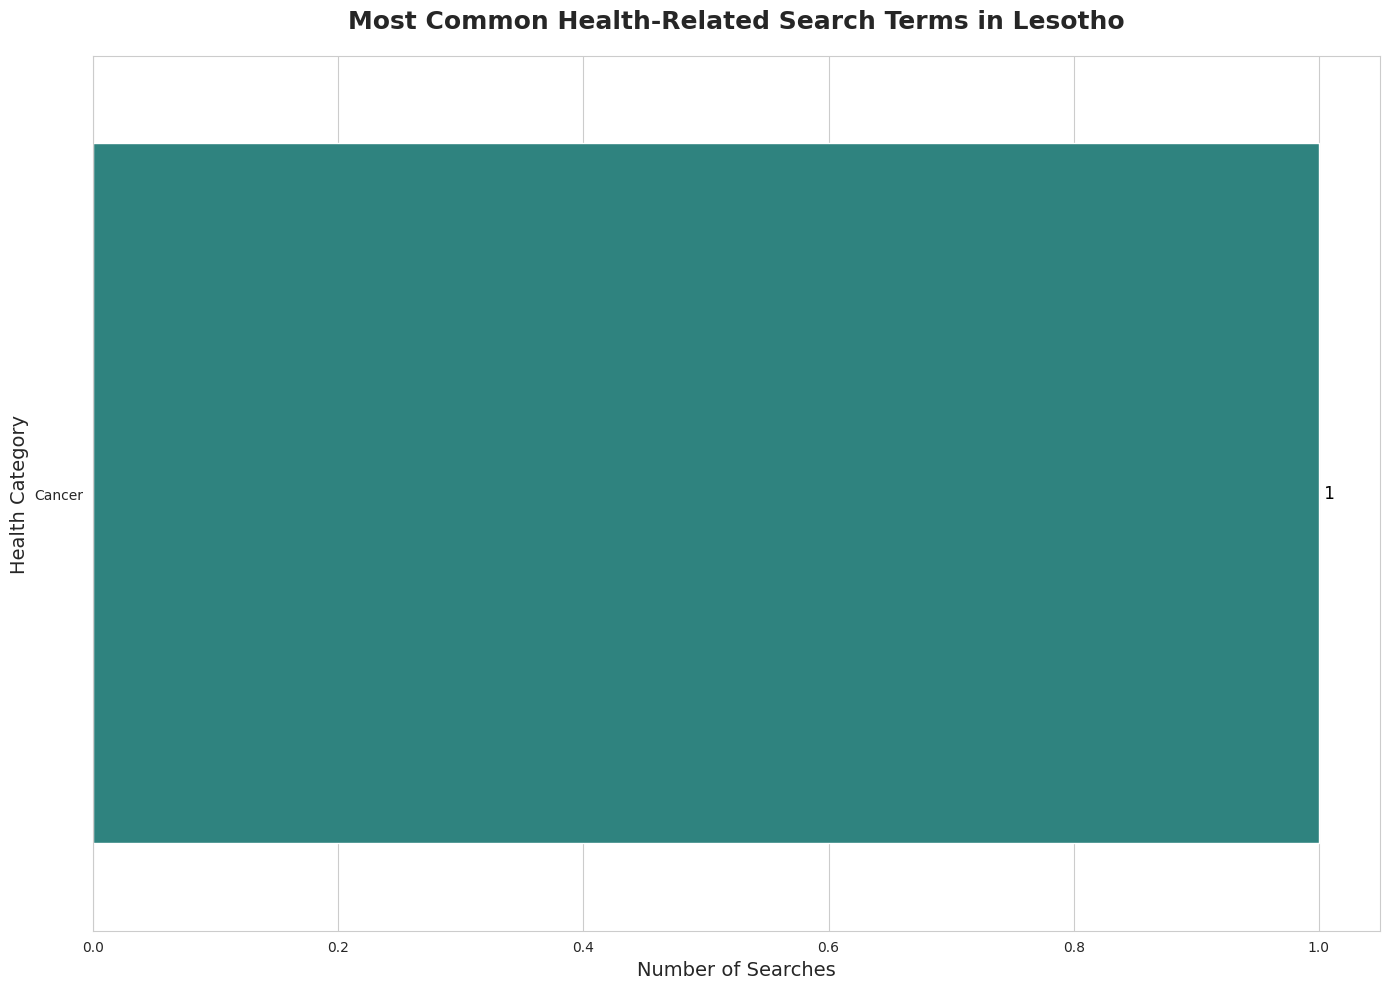

In [ ]:
# --- Step 4: Create and Save the Visualization ---

import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Create a horizontal bar plot
barplot = sns.barplot(
    x='Search Count',
    y='Health Category',
    data=category_counts,
    palette='viridis'
)

# Add a clear title and labels
plt.title('Most Common Health-Related Search Terms in Lesotho', fontsize=18, weight='bold', pad=20)
plt.xlabel('Number of Searches', fontsize=14)
plt.ylabel('Health Category', fontsize=14)

# Add the exact count at the end of each bar
for index, value in enumerate(category_counts['Search Count']):
    plt.text(value, index, f' {value}', va='center', fontsize=12, color='black')

# Ensure the plot layout is tight and clean
plt.tight_layout()

In [ ]:
# Save the plot to a file
output_filename = 'health_search_terms_chart.png'
plt.savefig(output_filename, dpi=300)

# Display the plot in the notebook
plt.show()

print(f"\nChart saved as '{output_filename}'. You can download it from the file browser on the left.")

In [ ]:
# --- DIAGNOSTIC CELL ---

# Check if the DataFrame 'df' exists
if 'df' in locals():
    print("--- 1. Unique values in 'activity_type' column ---")
    # This will show us all possible activity types, in case it's not 'search'
    print(df['activity_type'].unique())
    print("\n" + "="*50 + "\n")

    print("--- 2. A sample of unique, non-empty keywords in the entire file ---")
    # This shows us the 'ground truth' of what people are searching for, ignoring filters
    # .dropna() removes empty values, .unique() gets only the distinct ones
    unique_keywords = df['keyword'].dropna().unique()

    # Print the first 100 unique keywords to see what they look like
    print(f"Found {len(unique_keywords)} unique keywords in total.")
    print("Showing the first 100:")
    print(unique_keywords[:100])

else:
    print("DataFrame 'df' not found. Please load your data first.")

--- 1. Unique values in 'activity_type' column ---
['access_content' 'open_module' 'search' 'download_file' 'keyword_search'
 'advanced_search' nan]


--- 2. A sample of unique, non-empty keywords in the entire file ---
Found 41 unique keywords in total.
Showing the first 100:
['Video' ' Internet' 'Zoo' 'Zookeeper' '4th Grade' 'Hand Washing' 3
 'Cancer' 'Adult' 'WHO' 'Internet Search' 'Health' 'Sesotho Storybooks'
 'Sesotho' '8thÂ\xa0grade' '8thÂ\xa0grade, ' '8thÂ\xa0grade, Video'
 'Dance' 'Movie' 'Game' ' Ocean' ' Language Arts' '8thÂ\xa0grade, AED'
 '8thÂ\xa0grade, AED, ' 'Video Game' 'Music' 'Video Chat'
 'Vanua Levu, Abortion' 'Abortion' ', Video Game' 'Abortion, Video'
 'video call' '6th Grade' 'Addition' 'English Language' 'English'
 '4th Grade, Mathematics' 'Winds of Change' ', 4th Grade' 'Noun'
 'SolarSPELL']


In [ ]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.3 MB/s eta 0:00:00



--- Final Aggregated Counts (by Original Matched Keyword) ---
  Matched Keyword  Search Count
0        abortion             4
1    hand washing             3
2          cancer             1
3             who             1


/tmp/ipython-input-11-2820020800.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


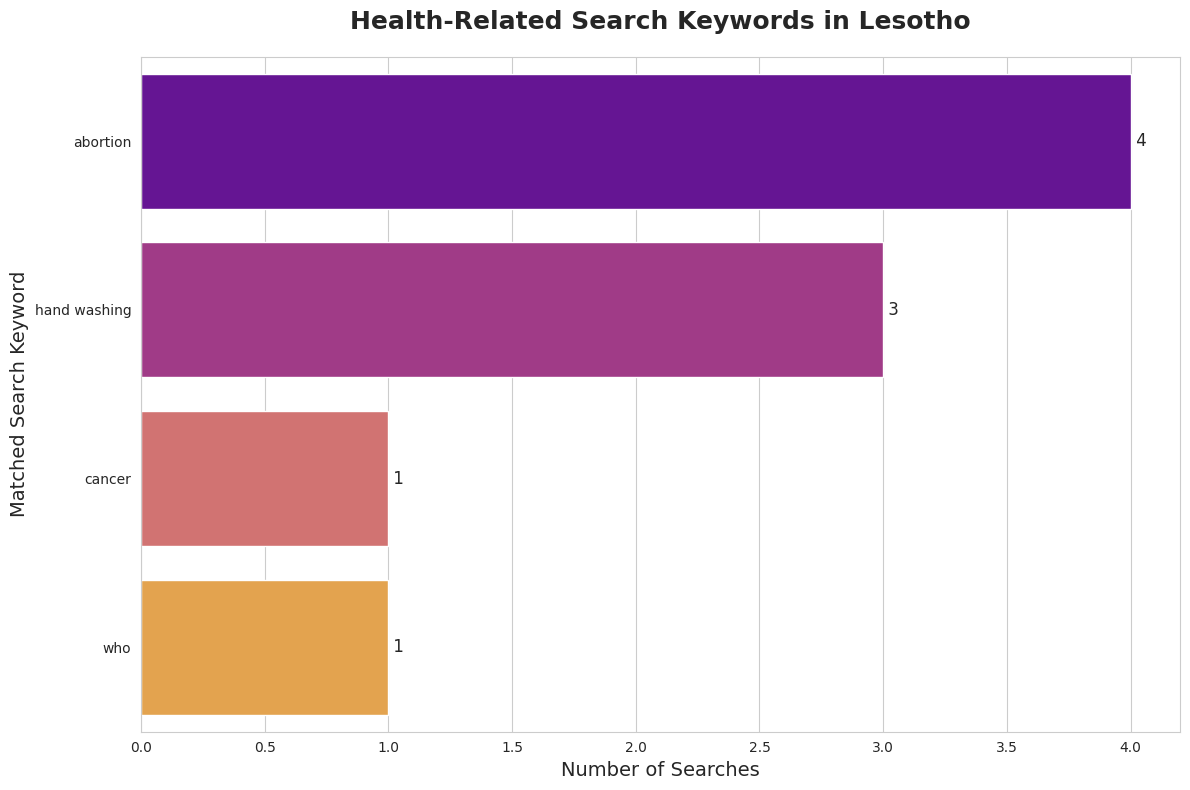

In [ ]:
# Import necessary libraries
from thefuzz import process
import re # Library for regular expressions, used for cleaning

# --- 1. SETUP & CONFIGURATION (Tailored to your data) ---

# Define all activity types that count as a "search"
SEARCH_ACTIVITY_TYPES = ['search', 'keyword_search', 'advanced_search']

# **UPDATED** list of health terms we are looking for.
# These will be the labels on our final chart.
health_keywords = [
    'cancer', 'cholera','hand washing', 'abortion', 'who', # Your new terms
    'malaria', 'tropical diseases', 'helminthiasis', 'chromoblastomycosis', 'taeniasis',
    'cysticercosis', 'leprosy', 'rabies', 'respiratory', 'flu', 'influenza', 'stroke',
    'alzheimer', 'depression', 'anxiety', 'diabetes', 'blood sugar', 'alcohol',
    'pregnancy', 'newborns', 'breastfeeding', 'heart', 'disease', 'sick', 'ill', 'cough', 'sleep', 'nutrition'
]


# --- 2. FUZZY MATCHING & DATA CLEANING FUNCTION ---

def clean_and_match(query, choices, score_cutoff=85):
    """
    Cleans the query string and then finds the best fuzzy match.
    """
    if not isinstance(query, str) or not query:
        return None

    cleaned_query = re.sub(r'[^a-zA-Z0-9\s]', '', query).strip().lower()
    if not cleaned_query:
        return None

    best_match = process.extractOne(cleaned_query, choices)

    if best_match and best_match[1] >= score_cutoff:
        return best_match[0]
    return None


# --- 3. DATA ANALYSIS PIPELINE (MODIFIED FOR ORIGINAL KEYWORDS) ---

# Filter for rows where activity_type is one of our defined search types
search_df = df[df['activity_type'].isin(SEARCH_ACTIVITY_TYPES)].copy()

# Apply our cleaning and fuzzy matching function to the 'keyword' column
search_df['matched_keyword'] = search_df['keyword'].apply(
    lambda x: clean_and_match(x, health_keywords)
)

# **CHANGE HERE:** Instead of mapping to a category, we will count the matched keywords directly.
# We use .dropna() to remove rows where no health keyword was matched.
keyword_counts = search_df['matched_keyword'].dropna().value_counts().reset_index()
keyword_counts.columns = ['Matched Keyword', 'Search Count']


# --- 4. VISUALIZATION (MODIFIED FOR ORIGINAL KEYWORDS) ---

print("\n--- Final Aggregated Counts (by Original Matched Keyword) ---")
if keyword_counts.empty:
    print("No health-related search terms were found that met the matching criteria.")
else:
    # Sort the results for a cleaner chart
    keyword_counts = keyword_counts.sort_values(by='Search Count', ascending=False)
    print(keyword_counts)

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # **CHANGE HERE:** We use 'Matched Keyword' for the y-axis
    barplot = sns.barplot(
        x='Search Count',
        y='Matched Keyword', # This now uses the original keyword
        data=keyword_counts,
        palette='plasma'
    )

    plt.title('Health-Related Search Keywords in Lesotho', fontsize=18, weight='bold', pad=20)
    plt.xlabel('Number of Searches', fontsize=14)
    plt.ylabel('Matched Search Keyword', fontsize=14) # Updated axis label

    # Add data labels
    for index, value in enumerate(keyword_counts['Search Count']):
        plt.text(value, index, f' {value}', va='center', fontsize=12)

    plt.tight_layout()
    plt.savefig('original_keywords_chart.png', dpi=300)
    plt.show()


--- Final Aggregated Counts (with 'Cholera' included) ---
  Matched Keyword  Search Count
0        abortion             4
1    hand washing             3
2          cancer             1
3             who             1


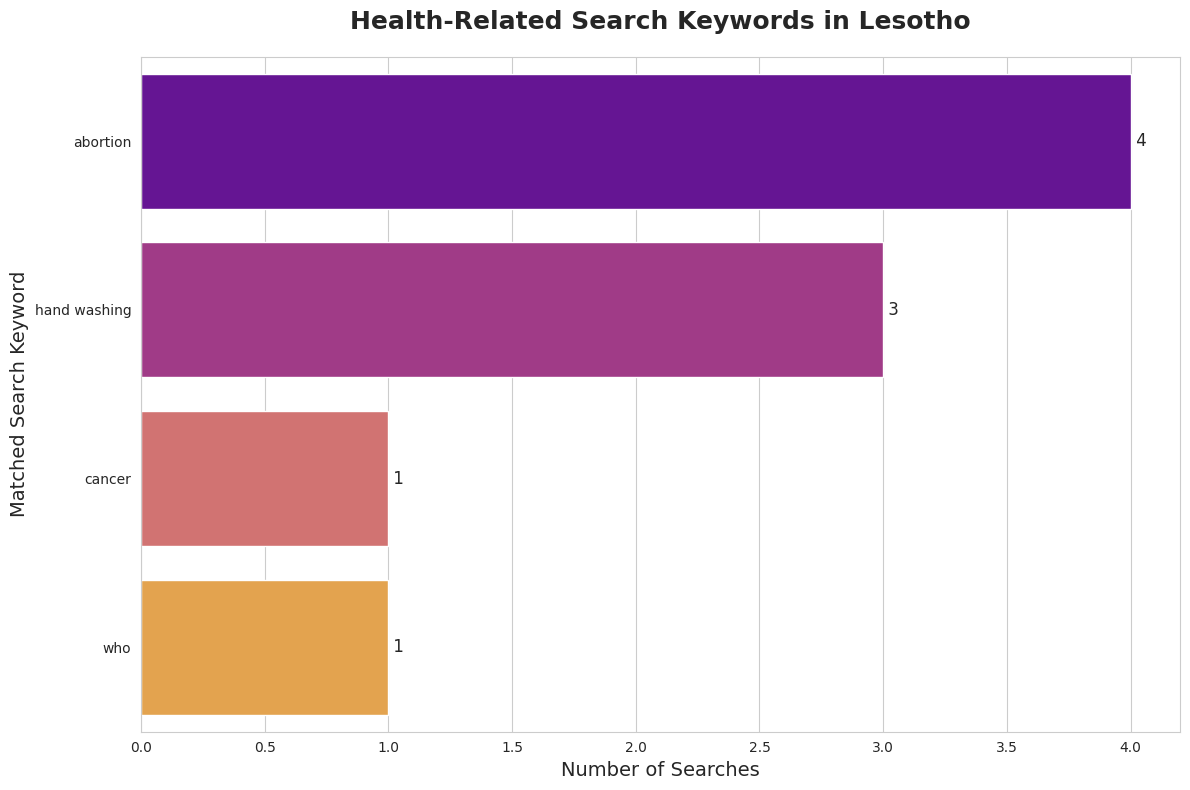

In [ ]:
# --- 1. SETUP & CONFIGURATION (Now including 'cholera') ---

# Define all activity types that count as a "search"
SEARCH_ACTIVITY_TYPES = ['search', 'keyword_search', 'advanced_search']

# **UPDATED** list of health terms we are looking for.
health_keywords = [
    'cholera', # <-- ADDED THIS KEYWORD
    'cancer', 'hand washing', 'abortion', 'who',
    'malaria', 'tropical diseases', 'helminthiasis', 'chromoblastomycosis', 'taeniasis',
    'cysticercosis', 'leprosy', 'rabies', 'respiratory', 'flu', 'influenza', 'stroke',
    'alzheimer', 'depression', 'anxiety', 'diabetes', 'blood sugar', 'alcohol',
    'pregnancy', 'newborns', 'breastfeeding', 'heart', 'disease', 'sick', 'ill', 'cough', 'sleep', 'nutrition'
]


# --- 2. FUZZY MATCHING & DATA CLEANING FUNCTION ---
# (This function remains the same, as it's already built to handle new keywords)

def clean_and_match(query, choices, score_cutoff=85):
    """
    Cleans the query string and then finds the best fuzzy match.
    """
    if not isinstance(query, str) or not query:
        return None

    cleaned_query = re.sub(r'[^a-zA-Z0-9\s]', '', query).strip().lower()
    if not cleaned_query:
        return None

    best_match = process.extractOne(cleaned_query, choices)

    if best_match and best_match[1] >= score_cutoff:
        return best_match[0]
    return None


# --- 3. DATA ANALYSIS PIPELINE ---

# Filter for rows where activity_type is one of our defined search types
search_df = df[df['activity_type'].isin(SEARCH_ACTIVITY_TYPES)].copy()

# Apply our cleaning and fuzzy matching function to the 'keyword' column
search_df['matched_keyword'] = search_df['keyword'].apply(
    lambda x: clean_and_match(x, health_keywords)
)

# Count the matched keywords directly
keyword_counts = search_df['matched_keyword'].dropna().value_counts().reset_index()
keyword_counts.columns = ['Matched Keyword', 'Search Count']


# --- 4. VISUALIZATION ---

print("\n--- Final Aggregated Counts (with 'Cholera' included) ---")
if keyword_counts.empty:
    print("No health-related search terms were found that met the matching criteria.")
else:
    # Sort the results for a cleaner chart
    keyword_counts = keyword_counts.sort_values(by='Search Count', ascending=False)
    print(keyword_counts)

    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    barplot = sns.barplot(
        x='Search Count',
        y='Matched Keyword',
        data=keyword_counts,
        palette='plasma'
    )

    plt.title('Health-Related Search Keywords in Lesotho', fontsize=18, weight='bold', pad=20)
    plt.xlabel('Number of Searches', fontsize=14)
    plt.ylabel('Matched Search Keyword', fontsize=14)

    # Add data labels
    for index, value in enumerate(keyword_counts['Search Count']):
        plt.text(value, index, f' {value}', va='center', fontsize=12)

    plt.tight_layout()
    plt.savefig('final_keywords_with_cholera_chart.png', dpi=300)
    plt.show()

In [ ]:
# --- DIAGNOSTIC CELL: Find any mention of 'cholera' ---

# We will search for the substring 'chol' to catch all variations (cholera, choleai, choilor)
search_string = 'chol'

# Ensure the DataFrame 'df' exists
if 'df' in locals():
    # Convert the 'keyword' column to string type to avoid errors, and make it case-insensitive
    keyword_series = df['keyword'].astype(str).str.lower()

    # Create a 'mask' to find all rows where the keyword contains our search_string
    cholera_rows = df[keyword_series.str.contains(search_string, na=False)]

    # --- Now, let's look at the results ---

    if not cholera_rows.empty:
        print(f"--- SUCCESS! Found {len(cholera_rows)} rows containing '{search_string}'. ---")
        print("Here are the details of those rows:")

        # Display the relevant columns for the found rows
        print(cholera_rows[['keyword', 'activity_type']])

    else:
        print(f"--- PROBLEM IDENTIFIED ---")
        print(f"The string '{search_string}' was NOT FOUND anywhere in the 'keyword' column of your file.")
        print("\nThis means the 'cholera' search data is not in the 'Combined2023-2025' file you uploaded.")
        print("The screenshot from your manager might be from a different data export.")

else:
    print("DataFrame 'df' not found. Please make sure you have loaded your data file first.")

--- PROBLEM IDENTIFIED ---
The string 'chol' was NOT FOUND anywhere in the 'keyword' column of your file.

This means the 'cholera' search data is not in the 'Combined2023-2025' file you uploaded.
The screenshot from your manager might be from a different data export.
